<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/CIFAR_10_Object_Recognition_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install kaggle

In [10]:
!ls

kaggle.json  sample_data


In [11]:
#dataset api
# Set permissions for the kaggle.json file
!chmod 600 kaggle.json

!kaggle datasets download -d 'toramky/compile-cifar-10'


403 - Forbidden - Permission 'datasets.get' was denied


In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [13]:
!kaggle competitions download -c cifar-10

 97% 695M/715M [00:07<00:00, 91.1MB/s]
100% 715M/715M [00:07<00:00, 104MB/s] 


In [14]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [15]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted!')

The dataset is extracted!


In [16]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [17]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.1 MB/s eta 0:00:00


In [18]:
import py7zr

archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [19]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
filenames = os.listdir('/content/train')

In [21]:
type(filenames)

list

In [22]:
len(filenames)

50000

In [23]:
print(filenames[0:5])
print(filenames[-5:])

['42520.png', '15913.png', '31441.png', '40300.png', '9534.png']
['19954.png', '23369.png', '38463.png', '25608.png', '25670.png']


In [24]:
labels_df = pd.read_csv('/content/trainLabels.csv')


In [25]:
labels_df.shape

(50000, 2)

In [26]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [27]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [28]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [29]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [30]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [31]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


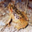

In [32]:
# displaying sample image

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

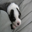

In [33]:
# displaying sample image

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [34]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [35]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [36]:
id_list = list(labels_df['id'])

# Image Processing

In [37]:
# convert images to numpy arrays
train_data_folder = '/content/train/'

data = []

for id in id_list:
  img = Image.open(train_data_folder + str(id) + '.png')
  img = np.array(img)
  data.append(img)

In [38]:
type(data)

list

In [39]:
len(data)

50000

In [40]:
type(data[0])

numpy.ndarray

In [41]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
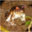

In [42]:
data[0]

In [43]:
# convert image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [44]:
type(X)

numpy.ndarray

In [45]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [48]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [49]:
X_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)
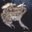

In [50]:
X_train[0]

# Building The Neural Network

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
#num_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [53]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# training the neural network
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 2.1155 - accuracy: 0.2142 - val_loss: 2.0134 - val_accuracy: 0.2463
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9937 - accuracy: 0.2453 - val_loss: 1.9721 - val_accuracy: 0.2508
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9592 - accuracy: 0.2467 - val_loss: 1.9507 - val_accuracy: 0.2512
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9472 - accuracy: 0.2477 - val_loss: 1.9411 - val_accuracy: 0.2540
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9390 - accuracy: 0.2490 - val_loss: 1.9524 - val_accuracy: 0.2528
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9341 - accuracy: 0.2479 - val_loss: 1.9551 - val_accuracy: 0.2403
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9284 - accuracy: 0.2524 - val_loss: 1.9244 - val_accuracy:

In [55]:
#ResNet50

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [56]:
convolutional_base = ResNet50(weights='imagenet',
                             include_top=False,
                             input_shape=(32,32,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                      

In [71]:
model = models.Sequential()
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [72]:
# Print the shape of the X_train_scaled data
print(X_train_scaled.shape)

# Ensure that the shape matches the expected input shape of the ResNet50 model
# If not, preprocess the data accordingly

(40000, 32, 32, 3)


In [73]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [74]:
# Reshape the X_train_scaled data to match the expected input shape of the ResNet50 model
X_train_scaled = X_train_scaled.reshape(-1, 32, 32, 3)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 83s 46ms/step - loss: 2.4413 - acc: 0.1133 - val_loss: 3.0689 - val_acc: 0.1433
Epoch 2/10
1125/1125 [==============================] - 47s 42ms/step - loss: 2.0138 - acc: 0.1937 - val_loss: 2.0181 - val_acc: 0.2192
Epoch 3/10
1125/1125 [==============================] - 54s 48ms/step - loss: 1.8956 - acc: 0.2541 - val_loss: 1.7889 - val_acc: 0.2990
Epoch 4/10
1125/1125 [==============================] - 49s 43ms/step - loss: 1.7061 - acc: 0.3374 - val_loss: 3.8274 - val_acc: 0.1752
Epoch 5/10
1125/1125 [==============================] - 54s 48ms/step - loss: 1.5309 - acc: 0.4174 - val_loss: 1.6250 - val_acc: 0.3960
Epoch 6/10
1125/1125 [==============================] - 48s 43ms/step - loss: 1.3937 - acc: 0.4924 - val_loss: 1.8335 - val_acc: 0.3440
Epoch 7/10
1125/1125 [==============================] - 54s 48ms/step - loss: 1.2860 - acc: 0.5482 - val_loss: 1.2041 - val_acc: 0.5658
Epoch 8/10
1125/1125 [==========================

In [75]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 6s 14ms/step - loss: 1.3992 - acc: 0.5319
Test Loss: 1.3991575241088867
Test Accuracy: 0.5318999886512756


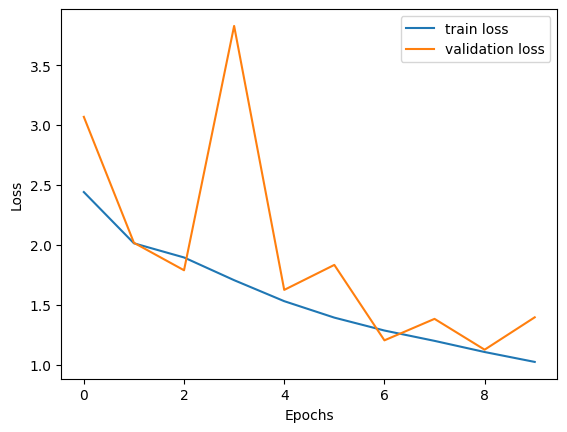

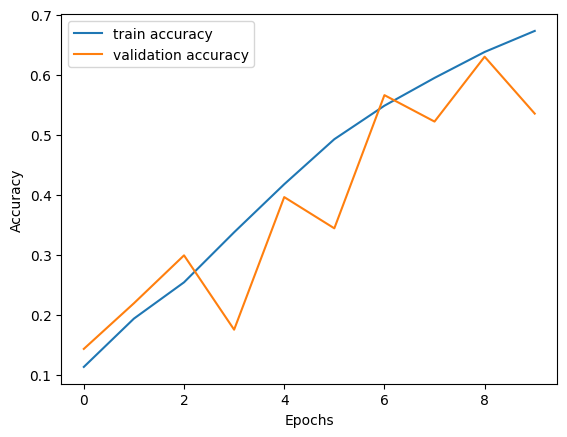

In [76]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()